In [1]:
from IPython.display import display, Markdown

import colombia_data_functions as cdf

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mcolors
import numpy as np
import folium
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#function to read, process, and clean up csvs to dataframes
sui_data = cdf.load_sui_data_from_csv()

## Introduction

The purpose of this notebook is to update key stakeholders (USAID, UPME, XM, etc.) on the progress that NREL has made in collecting data for dGen Colombia and to inspire further conversation on the validity of the collected data sources and other data requirements. 

__[The Distributed Generation Market Demand Model (dGen)](https://www.nrel.gov/analysis/dgen/)__ is designed to forecast the customer economics of solar PV adoption under various scenarios of incentives and rates. For example, we can forecast which customers will adopt rooftop PV under scenarios like the reduction of rate-subsidization in Colombia, or who will adopt PV if a net-metering scheme is introduced. dGen is well-established for modeling distributed PV capacity in the U.S. and we’ve applied the model to other countries like Mexico as well. 

USAID has tasked NREL with modeling distributed PV adoption under various scenarios in Colombia––this will help UPME with long-term capacity planning for renewables. In order to continue the momentum from last month’s workshop, we think it’s important to host this call to review some basic assumptions for the model. This will enable us to provide UPME with prompt and accurate results.  

This notebook is based around a core set of python functions (`colombia_data_functions.py`), although non-technical users should still be able to follow-along by studying the maps and visualizations provided. 

## Data Sources
Ideally, input from key stakeholders like UPME and XM will lead to a strong collaborative relationship. Through this relationship, proprietary data could be provided through an NDA or other mechanism in order to provide better data for modeling. Additionally, stakeholder input in the modeling process can lead to better results through the testing of scenarios most relevant to UPME. However, until this point little connection with UPME has been made, leaving the NREL team to collect data from publicaly available open data sources. 

After much searching on the internet, we've comiled this preliminary list of datasources:

| Data | Source | Granularity | Link | Notes |
| --- | --- | --- | --- | --- |
| __2018 Subscribers (Subscriptores)__ | SUI | By Departamento, Municipio, Land Type (Urban, Rural, etc.), Tariff Class (Estrato 1-6, Comercial, Industrial, Oficial), and Utility | www.sui.gov.co/web/energia/reportes/comerciales/consolidado-energia-por-empresa-departamento-y-municipio | Can't access from outside Colombia |
| __2018 Consumption (Consumo)__ | SUI | By Departamento, Municipio, Land Type (Urban, Rural, etc.), Tariff Class (Estrato 1-6, Comercial, Industrial, Oficial), and Utility | www.sui.gov.co/web/energia/reportes/comerciales/consolidado-energia-por-empresa-departamento-y-municipio | Can't access from outside Colombia |
| __2018 Average Bill (Factura Promedio)__ | SUI | By Departamento, Municipio, Land Type (Urban, Rural, etc.), Tariff Class (Estrato 1-6, Comercial, Industrial, Oficial), and Utility | www.sui.gov.co/web/energia/reportes/comerciales/consolidado-energia-por-empresa-departamento-y-municipio | Can't access from outside Colombia |
| __2018 Average Rate (Tarifa Media)__ | SUI | By Departamento, Municipio, Land Type (Urban, Rural, etc.), Tariff Class (Estrato 1-6, Comercial, Industrial, Oficial), and Utility | www.sui.gov.co/web/energia/reportes/comerciales/consolidado-energia-por-empresa-departamento-y-municipio | Can't access from outside Colombia |
| __Current Tariff (Costos Máximos Aplicables)__ | SUI | Appears to be complete rate structure by utility| www.sui.gov.co/web/energia/reportes/comerciales/costos-maximos-aplicables | Can't access from outside Colombia; Unsure if we're interpreting this correctly |
| __Demand Data (Costos Máximos Aplicables)__ | XM (Informacion Inteligente)| 8760 for each utility _total demand_.| http://informacioninteligente10.xm.com.co/pages/default.aspx | Not disagregatted by sector or location |
| __Solar Irradiation__ | Renewable Energy Data Explorer| Muliple types of 8760s (horizontal, tracking, fixed)| https://maps.nrel.gov/rede-colombia/ | None |


#### If there are better data sources we can be using (particularly for demand or load data!) please let us know.

## Functions
Detailed documentation for functions in `colombia_data_functions.py` can be found in the files docstrings. These functions __do not__ create the agents that will be used by dGen, but these functions do clean and process data that will be used in the generation of agents.

## Exploratory Data Analysis


### Subscribers Data:
The start our analysis of collected data, the first thing we want to look at is the number of subscribers by Departamento. This will produce an interactive map where we can select the sector in a legend. Shading is determined by percentile to represent the number of subscribers in an area. 

Clicking on a Departamento in the map will reveal the number of subscribers within that area. 

In [2]:
sub_data_dept = cdf.data_grouper(sui_data['Suscriptores'], level = 'Departamento')
sub_sector_dept_map = cdf.mapper(sub_data_dept,
                                  columns = 'sec_columns',
                                  level = 'Departamento')
display(Markdown("#### Number of Subscribers by Sector / Departamento"))
sub_sector_dept_map #calling map object to disply html

#### Number of Subscribers by Sector / Departamento

In [3]:
display(Markdown("#### Number of Subscribers by Tariff Class / Departamento"))
sub_data_dept

#### Number of Subscribers by Tariff Class / Departamento

Departamento  Unnamed: 0  Estrato 1  Estrato 2  Estrato 3  \
0            ANTIOQUIA     32640.0   479924.0   802357.0   575652.0   
1               ARAUCA      2076.0        0.0        0.0        0.0   
2            ATLANTICO     22237.0   302946.0   161325.0    86225.0   
3               BOGOTA      6593.0   150780.0   724217.0   731802.0   
4              BOLIVAR     33474.0   309622.0   127956.0    50242.0   
5               BOYACA    117165.0    50915.0   273740.0    64800.0   
6               CALDAS     58506.0    62881.0   114873.0    80516.0   
7              CAQUETA     18012.0    63888.0    21214.0     6019.0   
8             CASANARE     33712.0    36642.0    48652.0    15880.0   
9                CAUCA     82838.0   247112.0    72862.0    29449.0   
10               CESAR     63682.0   173509.0    93205.0    27204.0   
11               CHOCO     25571.0    79253.0     7102.0     2764.0   
12             CORDOBA     78622.0   302237.0    75603.0    20167.0   
13        CUNDINAMARCA    466718.0   100090.0   481180.0   241765.0   
14            GUAVIARE      4335.0     9187.0     5311.0     1331.0   
15               HUILA     97647.0   119250.0   148070.0    29591.0   
16          LA GUAJIRA     53550.0    82997.0    52841.0    11575.0   
17           MAGDALENA     77028.0   200520.0    54753.0    44072.0   
18                META    115872.0    84234.0   107281.0    78447.0   
19              NARINO    136600.0   242008.0   111256.0    37990.0   
20  NORTE DE SANTANDER    137522.0   119083.0   191223.0    62368.0   
21            PUTUMAYO     36690.0    50604.0    13868.0     1662.0   
22             QUINDIO     70813.0    39222.0    60303.0    42448.0   
23           RISARALDA    108927.0    50617.0   107536.0    76865.0   
24           SANTANDER    361073.0   172617.0   265050.0   142985.0   
25               SUCRE    122322.0   155278.0    56469.0     9717.0   
26              TOLIMA    275028.0   124578.0   216985.0    76052.0   
27     VALLE DEL CAUCA    454575.0   276915.0   461177.0   314345.0   

    Estrato 4  Estrato 5  Estrato 6  Total Residencial  Industrial  Comercial  \
0    172314.0    99130.0    42550.0          2171927.0     21526.0   168999.0   
1         0.0        0.0        0.0                0.0         2.0       11.0   
2     42728.0    15845.0    13587.0           622656.0      1260.0    36156.0   
3    292457.0    97445.0    78101.0          2074802.0     36057.0   242880.0   
4     19393.0     9617.0    11807.0           528637.0       697.0    24793.0   
5     17804.0     6316.0       34.0           413609.0      2380.0    33865.0   
6     21876.0     7058.0    10945.0           298149.0       781.0    27906.0   
7       891.0        0.0        0.0            92012.0       107.0     7018.0   
8      4747.0       38.0       12.0           105971.0       256.0    10500.0   
9     14968.0     3413.0      661.0           368465.0      1947.0    14113.0   
10     5959.0     2863.0      777.0           303517.0       450.0    13918.0   
11       16.0        0.0        0.0            89135.0       121.0     4714.0   
12     5149.0     1876.0     1578.0           406610.0       550.0    20581.0   
13    54983.0     9400.0     8074.0           895492.0     13379.0    62271.0   
14        1.0        0.0        0.0            15830.0        17.0     1869.0   
15     9391.0     1900.0      163.0           308365.0       939.0    22292.0   
16      512.0      154.0        0.0           148079.0       115.0     7730.0   
17    11233.0     4168.0    10190.0           324936.0       795.0    14331.0   
18    12153.0     4398.0     1613.0           288126.0       593.0    40073.0   
19    13020.0     3495.0       26.0           407795.0      1446.0    20191.0   
20    23298.0     4387.0      588.0           400947.0      1244.0    30316.0   
21        0.0        0.0        0.0            66134.0       282.0     5730.0   
22    13539.0    12054.0     1417.0           168983.0      1690.0    14978.0   
23    

Take note that while data appears to be complete for interconnected areas, non-interconnected Departamentos (i.e. Amazonas, etc.) are not included in this dataset, although they represent a small portion of overall subscribers and load. If it is desired to model these areas, data including the number of subscribers and annual consumption will need to be provided.

### Consumption Data:
Next, we want to look at the level of consumption by Departamento. Consumption is aggregated across the entire year of 2018 by Departamento. This will produce an interactive map where we can select the sector in a legend, because consumption in a Departamento is highly correlated with the number of subscribers, this map will look extremely similar to the Subscribers map above. 

Still, both Consumption data and the number of subscribers will be important data points for dGen. 

In [4]:
consumption_data_dept = cdf.data_grouper(sui_data['Consumo'], level = 'Departamento')
consumption_sector_dept_map = cdf.mapper(consumption_data_dept,
                                      columns = 'sec_columns',
                                      level = 'Departamento')
display(Markdown("#### Total Annual Consumption by Sector / Departamento"))
consumption_sector_dept_map #calling map object to disply html

#### Total Annual Consumption by Sector / Departamento

In [5]:
display(Markdown("#### GWh of Consumption by Tariff Class / Departamento"))
GWh_consumption_data_dept = consumption_data_dept[consumption_data_dept.columns[1:]] / 1000000
GWh_consumption_data_dept = pd.concat([consumption_data_dept[['Departamento']], GWh_consumption_data_dept], axis = 'columns')
GWh_consumption_data_dept

#### GWh of Consumption by Tariff Class / Departamento

Departamento  Unnamed: 0    Estrato 1    Estrato 2    Estrato 3  \
0            ANTIOQUIA    0.032640   427.517982   870.067415   717.169261   
1               ARAUCA    0.002076     0.000000     0.000000     0.000000   
2            ATLANTICO    0.022237  1265.125026   514.844714   310.082326   
3               BOGOTA    0.006593   241.508565  1267.605407  1286.324363   
4              BOLIVAR    0.033474   842.314419   373.685817   171.973346   
5               BOYACA    0.117165    41.878980   233.300338    77.958783   
6               CALDAS    0.058506    62.388185   132.157035   106.578013   
7              CAQUETA    0.018012    64.475495    27.604507     8.916223   
8             CASANARE    0.033712    47.389111    76.192468    28.315613   
9                CAUCA    0.082838   251.008025    90.661465    39.708587   
10               CESAR    0.063682   485.859188   278.437422    93.846726   
11               CHOCO    0.025571   108.093568    11.532544     6.274603   
12             CORDOBA    0.078622   701.554866   228.780397    78.580184   
13        CUNDINAMARCA    0.466718   138.957131   677.666788   309.820482   
14            GUAVIARE    0.004335    10.264000     7.941733     2.450122   
15               HUILA    0.097647   129.378710   208.247830    49.552257   
16          LA GUAJIRA    0.053550   320.120403   221.483905    50.878755   
17           MAGDALENA    0.077028   742.424115   189.267640   162.874663   
18                META    0.115872   110.306134   146.032884   125.410864   
19              NARINO    0.136600   200.680238   117.322707    49.850787   
20  NORTE DE SANTANDER    0.137522   162.417844   329.233968   126.552812   
21            PUTUMAYO    0.036690    47.852998    19.491528     2.566650   
22             QUINDIO    0.070813    44.806496    72.664294    57.090509   
23           RISARALDA    0.108927    54.579776   130.462916    96.817029   
24           SANTANDER    0.361073   211.349344   324.978118   231.025135   
25               SUCRE    0.122322   331.015987   148.450480    30.900730   
26              TOLIMA    0.275028   125.301273   245.357432    97.886675   
27     VALLE DEL CAUCA    0.454575   391.622601   709.101356   507.276818   

     Estrato 4   Estrato 5   Estrato 6  Total Residencial   Industrial  \
0   251.033350  172.355862  104.780595        2542.924465  2045.270412   
1     0.000000    0.000000    0.000000           0.000000     0.488783   
2   194.043932   90.311542  128.882368        2503.289908   800.094636   
3   526.005333  216.962307  245.693440        3784.099415  1938.397579   
4    89.861832   52.116197   90.075034        1620.026646   826.051844   
5    18.757600    6.471288    0.051115         378.418104   953.753502   
6    30.783306    9.786425   16.411974         358.104938   429.181214   
7     1.836150    0.000000    0.000000         102.832375     8.815910   
8     9.122252    0.100365    0.019395         161.139204    83.869267   
9    21.956888    5.455230    1.402554         410.192749   400.257960   
10   27.769131   17.455206    6.398814         909.766487   199.640341   
11    0.022194    0.000000    0.000000         125.922909    15.728497   
12   26.051226   11.233071   12.599714        1058.799458   134.891594   
13   80.589033   19.909908   38.553467        1265.496809  2015.586683   
14    0.007644    0.000000    0.000000          20.663499    -4.786726   
15   22.644181    7.722226    0.531056         418.076260   224.903718   
16    2.494971    0.703095    0.000000         595.681129    38.881825   
17   56.735153   20.025421   49.550583        1220.877575   194.190645   
18   25.171410   11.507798    5.728612         424.157702   591.097871   
19   18.472610    5.196212    0.064951         391.587505    33.778467   
20   66.521747   17.324082    3.137295         705.187748   186.790603   
21    0.000000    0.000000    0.000000          69.911177  -448.218671   
22   20.625617   17.267055    3.197097         215.651068    55.705100   


Based on this output, we can see that consumption is concentrated in urban areas across Colombia, although there are some sectoral discrepancies. For instance, comerical load is high in _Meta_ (the Departamento south of Bogota) and _Antioquia_ (the Departamento containing Medellin) and _Cundinmaraca_ (the Departamento surrounding Bogota) have high levels of industrial consumption. 

The complete dataset available from SUI includes data at the Municipio granularity, the same sectoral data from above is visualized below at the Municipio level. 

In [6]:
consumption_data_muni = cdf.data_grouper(sui_data['Consumo'], level = 'Municipio')
consumption_sector_muni_map = cdf.mapper(consumption_data_muni,
                                      columns = 'total_residencial',
                                      level = 'Municipio')
display(Markdown("#### Total Annual Consumption by Sector / Municipio"))
consumption_sector_muni_map

#### Total Annual Consumption by Sector / Municipio

The granularity of this dataset is impressive––there are some 1000+ Municipios in Colombia and we now have total consumption, total subscribers, average consumption, and average rate data for each. 

If each agent is asigned a Municipio as its geography, a baseline of 1000 agents is a good start. For comparison, the deployment of dGen Mexico operated at the control region level (~10). 

Other features that can potentially be used to further disagregate agents, including Sector, rate class, land type, and utility (Empresa). 

Let's start examining some of these different features to see which are useful for disaggregating the data further. A useful feature will provide significant variation in terms of consumption patterns at the Municipio level.

### Estrato:
Below, we'll look at the six different residential rate classes (Estrato 1 - 6). Each represents a different level of cross-subsidization provided to residential subscribers. Estrato 1 - 3 are receiving subsidization, Estrato 4 is paying real cost of generation The map below will help us understand if the _Average Subscribers Total Consumption_ varies based on the Estrato level they are subscribed to. We can test this by selecting the different layers available in the legend and comparing them.

For the sake of simplicity, we'll map this data at the Departamento level, although we likely will be using this data at the Municipio level. 

In [7]:
consumprom_data_dept = cdf.data_grouper(sui_data['Consumo Promedio'], level = 'Departamento', func = 'mean')
consumprom_estrata_dept_map = cdf.mapper(consumprom_data_dept,
                                      columns = 'estrata_columns',
                                      level = 'Departamento')
display(Markdown("#### Annual Average Residential Consumption by Estrato / Departamento"))
consumprom_estrata_dept_map

#### Annual Average Residential Consumption by Estrato / Departamento

Clearly Estrato 5 - 6 are concentrated in urban areas and have different consumption patterns than other levels. As the choropleth maps don't provide the relative values for each shade, we will print these below. 

consumption  subscribers  average consumption (kWh)
Estrato 1   7.560190e+09    4086909.0                1849.855345
Estrato 2   7.652573e+09    4856409.0                1575.767838
Estrato 3   4.826682e+09    2861933.0                1686.511290
Estrato 4   1.950816e+09     997375.0                1955.950209
Estrato 5   9.012207e+08     386064.0                2334.381702
Estrato 6   8.541633e+08     228145.0                3743.949121
Comercial   1.207931e+10    1056177.0               11436.824996
Industrial  1.368306e+10     105206.0              130059.732981
Oficial     1.978550e+09      63364.0               31225.145398

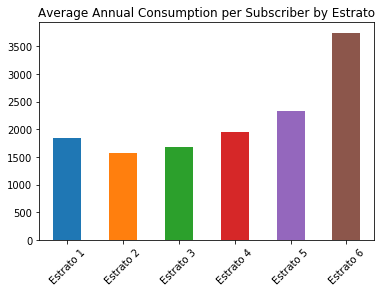

In [8]:
consum_dept = cdf.data_grouper(sui_data['Consumo'], level = 'Departamento', func = 'sum')
consum_dept_grouped = consum_dept[[f'Estrato {i}' for i in range(1,7)] + ['Comercial', 'Industrial', 'Oficial']].T.sum(axis = 1)
consum_dept_grouped.name = 'consumption'
sub_dept = cdf.data_grouper(sui_data['Suscriptores'], level = 'Departamento', func = 'sum')
sub_dept_grouped = sub_dept[[f'Estrato {i}' for i in range(1,7)] + ['Comercial', 'Industrial', 'Oficial']].T.sum(axis = 1)
sub_dept_grouped.name = 'subscribers'

estrato_sus_and_con = pd.concat([consum_dept_grouped, sub_dept_grouped], axis = 'columns')
estrato_sus_and_con['average consumption (kWh)'] = estrato_sus_and_con['consumption'] / estrato_sus_and_con['subscribers']

to_plot = estrato_sus_and_con.loc[estrato_sus_and_con.index.isin([f'Estrato {i}' for i in range(1,7)])]
to_plot['average consumption (kWh)'].plot.bar(rot = 45,
                                              title = 'Average Annual Consumption per Subscriber by Estrato')

estrato_sus_and_con

Estrato 6 has close to double the average annual consumption of Estratos 1 - 4. However the relationship between consumption and Estrato is not linear, as Estrato 1 has a higher annual consumption than Estrato 2 and Estrato 6 is significantly higher than even Estrato 5. 

The nine different tariff classes (Estrato 1 - 6, Comercial, Industrial, Oficial) will be useful features in predicting the variability of agents. Likewise, agents can exist for each rate class for each of the 1000+ agents, resulting in around 9000+ agents. 

### Land Type:

Another consideration mentioned above is disaggregating agents by land-type. The SUI dataset includes consumption and subscribes data divided by Urban, Rural, and Centro Poblado land types. However, it's not immediately clear whether Departamentos or Municipios are already small enough to only contain a single land type, or if some Municipios contain numerous land types. 

First, let's look at what percentage of national total load comes from each land type:

In [9]:
land_type_df = cdf.land_type_aggregator(sui_data['Consumo'])
land_type_pct = land_type_df.groupby(['Departamento']).sum()
total_consumption = sum([land_type_df[i].sum() for i in ['Urbano','Rural','Centro Poblado']])

land_type_pct['Urbano'] = land_type_pct['Urbano'] / total_consumption
land_type_pct['Rural'] = land_type_pct['Rural'] / total_consumption
land_type_pct['Centro Poblado'] = land_type_pct['Centro Poblado'] / total_consumption

total_land_type_pct = pd.Series([land_type_pct[i].sum() for i in ['Urbano', 'Rural', 'Centro Poblado']], index = ['Urbano','Rural','Centro Poblado'])
display(Markdown("#### Percentage of National Consumption by Land Type"))
total_land_type_pct

#### Percentage of National Consumption by Land Type

Urbano            0.864268
Rural             0.133294
Centro Poblado    0.002437
dtype: float64

86.4% of all consumption is Urban, and 13.3% is Rural. Centro Poblado (translated to city center) is an extremely small 0.2% of consumption. 

Because such a large majority of consumption is urban, it likely doesn't make sense to create agent based on land type in addition to Municipio, unless there are several notable examples where-in there is a significant split of Urban and Rural consumption within a Municipio. 

Below, the percentage of total national load by land type and Departamento is listed.

In [10]:
display(Markdown("#### Percentage of National Consumption by Land Type / Departamento"))
land_type_pct

#### Percentage of National Consumption by Land Type / Departamento

Rural  Centro Poblado    Urbano
Departamento                                          
ANTIOQUIA           0.019249    8.262017e-06  0.099331
ARAUCA              0.000010    0.000000e+00  0.000052
ATLANTICO           0.001373    0.000000e+00  0.085739
BOGOTA              0.003482    7.587044e-06  0.162686
BOLIVAR             0.004482    1.467954e-04  0.058865
BOYACA              0.001189    0.000000e+00  0.020082
CALDAS              0.002528    6.547538e-04  0.015522
CAQUETA             0.000573    0.000000e+00  0.003029
CASANARE            0.001510    0.000000e+00  0.010951
CAUCA               0.007145    3.538506e-06  0.009903
CESAR               0.002917    0.000000e+00  0.024193
CHOCO               0.000425    5.692351e-08  0.003288
CORDOBA             0.004399    0.000000e+00  0.024725
CUNDINAMARCA        0.030099    1.094101e-03  0.045200
GUAVIARE            0.000014    0.000000e+00 -0.002772
HUILA               0.005552    0.000000e+00  0.012026
LA GUAJIRA          0.000166    0.000000e+00  0.014765
MAGDALENA           0.000625    1.294279e-05  0.033865
META                0.017340    3.203644e-09  0.039835
NARINO              0.002832    6.937066e-07  0.008184
NORTE DE SANTANDER  0.003941    0.000000e+00  0.018555
PUTUMAYO           -0.007938    8.898033e-05  0.000783
QUINDIO             0.001437    1.258221e-04  0.006332
RISARALDA           0.002250    2.235394e-04  0.013354
SANTANDER           0.008066    0.000000e+00  0.032726
SUCRE               0.001276    0.000000e+00  0.014565
TOLIMA              0.003495    5.567228e-06  0.016305
VALLE DEL CAUCA     0.014856    6.478016e-05  0.092178

Antioquio (which contains Medellin) and Cundinamarca (which contains suburbs of Bogota) are the only two Departamentos with single-digit percentages of both Rural and Urban consumption. The entire list of Municipios is too long to display in this notebook, but it's clear that Municipios in Antioquio and Cundinamarca are segregated between Rural and Urban dominance. 

It's unclear why Putumayo-Rural and Guaviare-Urban have negative consumption values. This could be an error in the data, or due to existing distributed generation? Further clarification on this is needed.

It does not appear that generating different agents for Urban and Rural consumption within a Municipio will add additional value to the model. However, this data could be useful when determining the load profiles for agents at the Municipio level. 

### Tariffs:
The SUI database also includes data on the average electricity rate paid by each tariff class in each utility/Municipio territory. It is not clear if ratepayers in Colombia pay a flat energy charge, or have additional bill components such as a demand charge, metering charge, or distribution charge. If these components do exist, it's unclear if the 'Tarifa Media' includes these on an average per kWh basis, or if they have otherwise been accounted for. 

The map below shows the average tariff for every Municipio. 

In [11]:
tariff_data_dept = cdf.data_grouper(sui_data['Tarifa Media'], level = 'Departamento', func = 'mean')
tariff_all_dept_map = cdf.mapper(tariff_data_dept,
                                      columns = 'all_columns',
                                      level = 'Departamento')
display(Markdown("#### Annual Average Tariff paid ($/kWh) by Rate Class / Departamento"))
tariff_all_dept_map

#### Annual Average Tariff paid ($/kWh) by Rate Class / Departamento

The results of examining this data do not make sense, in almost every Departamento the _Tarifa Media_ is lower for Estrato 5 and 6 than for Estratos 1-4. For instance, in Bogota Estrato 6 paid an average of 475.40 \$/kWh in 2018, while Estrato 1 paid 491.54 \$/kWh. 

The swarmplot below visualizes the puzzling trend the SUI _Tarifa Media_, showing that retail tariffs appear to be decreasing as the Estrato increases. 

In [12]:
display(Markdown("#### Bogota Average Tariff paid ($/kWh) from Tarifa Media Data"))
tariff_data_dept.loc[tariff_data_dept['Departamento'] == 'BOGOTA']

#### Bogota Average Tariff paid ($/kWh) from Tarifa Media Data

Departamento  Unnamed: 0  Estrato 1   Estrato 2  Estrato 3  Estrato 4  \
3       BOGOTA       347.0     491.54  487.376667     474.87    478.895   

    Estrato 5  Estrato 6  Total Residencial  Industrial   Comercial  Oficial  \
3  487.293333   475.3675           477.6825    381.5025  377.475294  406.365   

     Otros  Total No Residencial  year  
3  430.123            371.085789  2018

#### Swarmplot of Average Tariff paid ($/kWh) by Rate Class / Departamento

[Text(0, 0.5, '$/kWh'), Text(0.5, 0, 'Rate Class')]

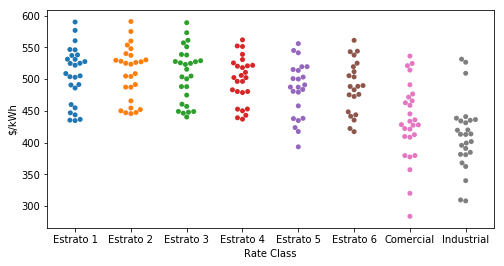

In [13]:
tariff_data_dept = cdf.data_grouper(sui_data['Tarifa Media'], level = 'Departamento', func = 'mean')
tariff_melt_dept = pd.melt(tariff_data_dept, id_vars = ['Departamento'], value_vars = [f"Estrato {i}" for i in range (1, 7)] + ['Comercial','Industrial'])
tariff_melt_dept = tariff_melt_dept.loc[tariff_melt_dept['value'] > 0] #deal with a few weird outliers with a negative tariff
fig, ax = plt.subplots(figsize=(8,4))
display(Markdown("#### Swarmplot of Average Tariff paid ($/kWh) by Rate Class / Departamento"))
sns.swarmplot(x = 'variable', y = 'value', data = tariff_melt_dept, ax = ax)
ax.set(ylabel = '$/kWh', xlabel = 'Rate Class')

It's unclear where this error is coming from, although it is possible we are misinterpreting what _Tarifa Media_ means or the subsidy afforded to Estrato 1-3 is being incorporated into the rate in some other way. In either case, we will likely need to find a better data source containing the real energy rates in addition to any fixed charges for each Utility, Municipio, and rate class.

In an effort to double-check the apparent error in the SUI _Tarifa Media_ data, we tried dividing the total consumption (_Consumo_) data by the total amount charged by the utility _Total Facturado_ for each Municipio/Utility/Land Type combination. 

In [14]:
test_tariff = sui_data['Consumo'].merge(sui_data['Total Facturado'], on = ['Departamento','Municipio','Empresa','land_type'], suffixes = ['_consumo','_facturado'])
for i in [f"Estrato {j}" for j in range (1, 7)] + ['Comercial','Industrial','Oficial','Total Residencial','Total No Residencial']:
    test_tariff[f"{i}_average_rate"] = test_tariff[f"{i}_facturado"] / test_tariff[f"{i}_consumo"]

test_tariff = test_tariff[['Departamento','Municipio','Empresa','land_type'] + [i for i in test_tariff.columns if '_average_rate' in i]]
test_tariff_grouped = cdf.data_grouper(test_tariff, level = 'Departamento', land_type = 'Total', func = 'mean')
display(Markdown("#### Bogota Average Tariff paid ($/kWh) from Self Calculated Data"))
test_tariff_grouped.loc[test_tariff_grouped['Departamento'] == 'BOGOTA']

#### Bogota Average Tariff paid ($/kWh) from Self Calculated Data

Departamento  Estrato 1_average_rate  Estrato 2_average_rate  \
3       BOGOTA              491.542878               487.37599   

   Estrato 3_average_rate  Estrato 4_average_rate  Estrato 5_average_rate  \
3              474.867495              478.894882              487.291505   

   Estrato 6_average_rate  Comercial_average_rate  Industrial_average_rate  \
3              475.363929              377.475976                381.50262   

   Oficial_average_rate  Total Residencial_average_rate  \
3            406.364238                      467.162706   

   Total No Residencial_average_rate  
3                         444.916033

Identical rates were found, indicating that the _Tarif Media_ dataset was most likely calculated by SUI in the same way.

### Demand Profiles
For each agent dGen requires an 8760 (one year of hourly data) of load or demand data. Ideally, UPME could provide observed data from several representative customers. Having a different Demand Profile for each Municipio/Rate combination, or at least for each Empresa/Rate combination would be sufficient. 

Absent this granular data, we've received a collection of 8760s from XM's _Informacion Intelligente_ portal. This data consists of an 8760 of total demand (measured in kW) for each utility in Colombia. 

#### Average Daily Demand Profile Based on 2018 8760 For Each Empresa

[Text(0, 0.5, 'MW'), Text(0.5, 0, 'Hourly Demand')]

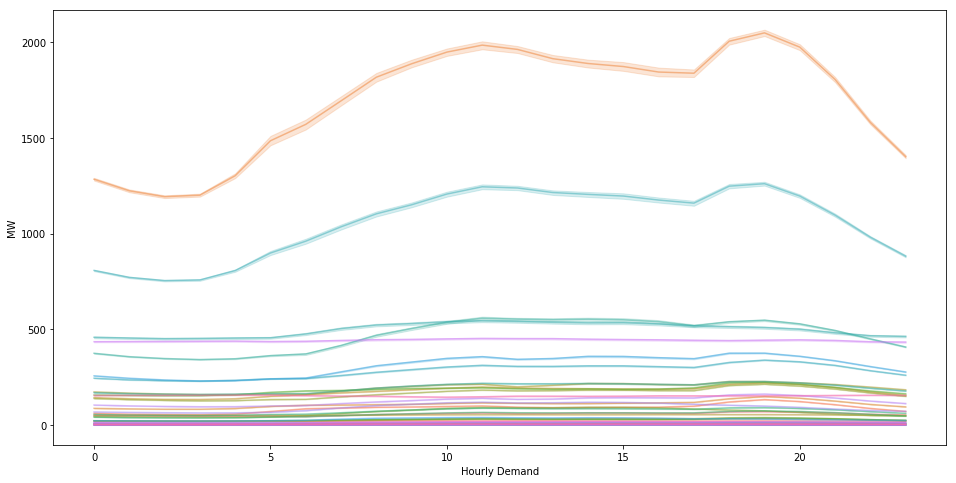

In [15]:
consumo = sui_data['Consumo']
demand_melt_df = cdf.demand_8760_getter(input_codes = list(set(consumo['Empresa'])))
demand_melt_df_grouped = demand_melt_df.groupby(['Empresa','Fecha','hour'], as_index = False).sum()

fig, ax = plt.subplots(figsize = (16,8))
display(Markdown("#### Average Daily Demand Profile Based on 2018 8760 For Each Empresa"))
sns.lineplot('hour','demand', hue = 'Empresa', data = demand_melt_df_grouped, ax = ax, legend = False, alpha = 0.5)
ax.set(xlabel = 'Hourly Demand', ylabel = 'MW')

The plot above shows the average daily demand profile for each utility tracked by XM. There is a clear diversity in the size of utilities: there are a handful of large utilities that have an enormous peak demand and a large number of smaller utilities. 

This dataset does not account for differences in rate class as most utilities represent a blend of different consumer types. It does not make sense to map this data on the utility level to individual agents at the Municipio level as demand profiles have a large discrepency in volume between utilities.

Ideally, an entity like UPME can provide specific demand profiles for each Municipio and rate class. This dataset could be measured meter data based on actual observations, or representative statistical models. 

Without this data, an alternative approach is to derive demand profiles for each rate class based on deviations in the percentage of consumption by rate class in each utility. For example, if Utility X provides electricity primarily to commercial customers, than it's load profile is likely somewhat representative of all commercial customers in Colombia. Likewise, if Utility Y provides electricity primarily to Estrato 1 customers, it's demand profile can be inputted for all Estrato 1 agents. 

In [16]:
pctdf, mean_demand_df = cdf.mean_8760_getter(df = consumo, demand_melt_df = demand_melt_df)
pctdf = pctdf.drop(['Unnamed: 0', 'year'], axis = 'columns')
display(Markdown("#### Percentage of Consumption by Rate Class for Each Empresa"))
pctdf

#### Percentage of Consumption by Rate Class for Each Empresa

Estrato 1  Estrato 2  Estrato 3  Estrato 4  Estrato 5  Estrato 6  \
Empresa                                                                     
CASD         0.078      0.124      0.045      0.015      0.000      0.000   
CCOC         0.000      0.000      0.000      0.000      0.000      0.000   
CDND         0.347      0.203      0.086      0.031      0.008      0.000   
CDSD         0.041      0.212      0.174      0.066      0.026      0.031   
CEOD         0.414      0.143      0.061      0.035      0.009      0.002   
CETD         0.031      0.218      0.143      0.035      0.037      0.002   
CHCD         0.106      0.240      0.204      0.054      0.013      0.021   
CHVC         0.000      0.000      0.000      0.000      0.000      0.000   
CNSD         0.180      0.312      0.115      0.059      0.015      0.003   
CQTD         0.334      0.145      0.046      0.009      0.000      0.000   
CTGD         0.082      0.209      0.252      0.083      0.025      0.004   
CTSD         0.125      0.241      0.090      0.034      0.010      0.003   
DCLC         0.000      0.001      0.002      0.008      0.011      0.007   
EBPD         0.588      0.302      0.036      0.000      0.000      0.000   
EBSD         0.111      0.615      0.206      0.050      0.017      0.000   
EDCD         0.349      0.145      0.067      0.030      0.014      0.021   
EDPD         0.574      0.055      0.033      0.000      0.000      0.000   
EDQD         0.118      0.191      0.151      0.054      0.046      0.008   
EEPD         0.059      0.129      0.073      0.067      0.042      0.042   
EGVD         0.519      0.370      0.110      0.000      0.000      0.000   
EMED         0.003      0.043      0.001      0.007      0.000      0.000   
EMID         0.077      0.111      0.120      0.052      0.043      0.028   
EMSD         0.039      0.053      0.046      0.009      0.004      0.002   
ENDC         0.000      0.000      0.000      0.000      0.000      0.000   
EPMD         0.056      0.115      0.094      0.033      0.022      0.013   
EPSD         0.081      0.167      0.062      0.016      0.008      0.001   
EPTD         0.450      0.146      0.026      0.000      0.000      0.000   
ESPC         0.000      0.000      0.000      0.000      0.000      0.000   
ESSD         0.133      0.187      0.129      0.090      0.015      0.014   
ETTC         0.006      0.021      0.018      0.022      0.023      0.014   
EVSD         0.613      0.194      0.002      0.000      0.000      0.000   
GECC         0.000      0.000      0.000      0.000      0.000      0.000   
GNCC         0.000      0.001      0.015      0.021      0.020      0.028   
HLAD         0.166      0.266      0.063      0.029      0.010      0.001   
ISGC         0.000      0.000      0.000      0.000      0.000      0.000   
ITLC         0.000      0.000      0.000      0.000      0.000      0.000   
NRCC         0.000      0.000      0.000      0.003      0.000      0.000   
PEEC         0.000      0.000      0.000      0.000      0.000      0.000   
RQEC         0.000      0.000      0.000      0.000      0.000      0.000   
RTQD         0.000      0.000      0.004      0.009      0.011      0.037   
SOEC         0.000      0.000      0.000      0.000      0.000      0.000   
TPLC         0.000      0.000      0.000      0.000      0.000      0.000   

         Industrial  Comercial  Oficial  Otros  
Empresa                                         
CASD          0.070      0.294    0.146  0.229  
CCOC          1.000      0.000    0.000  0.000  
CDND          0.048      0.137    0.050  0.089  
CDSD          0.116      0.238    0.030  0.066  
CEOD          0.143      0.100    0.043  0.049  
CETD          0.220      0.196    0.048  0.070  
CHCD          0.048      0.244    0.018  0.053  
CHVC          0.931      0.068    0.000  0.000  
CNSD          0.055      0.181    0.049  0.031  
CQTD          0.038      0.243    0.125  0.060  
CTGD          0.174      0.093  

The above chart shows that some Empresas _do_ serve a disproportionately high amount of load from a single rate class. For instance, utilities _EVSD_, _EBPD_, _EDPD_, and _EGVD_ each provide over 50% of their consumption to Estrato 1 customers. Conversely, _CCOC_, _GECC_, _ITLC_, and _ISGC_ are single purpose utilities (possibly non-commercial) that only provide power to industrial customers. 

Using this data, we can select the 5 utilities that provide the largest share of their load to a particular rate class and then average their annual demand profiles to get a sampled demand profile for a given class. In order to deal with utilities of different sizes, we first scale every utilities demand profile to an equal volume of demand. 

The plot below displays the average day for each generated demand profile by rate class. 

#### Calculated Average Daily Demand Profile Based For Each Rate Class

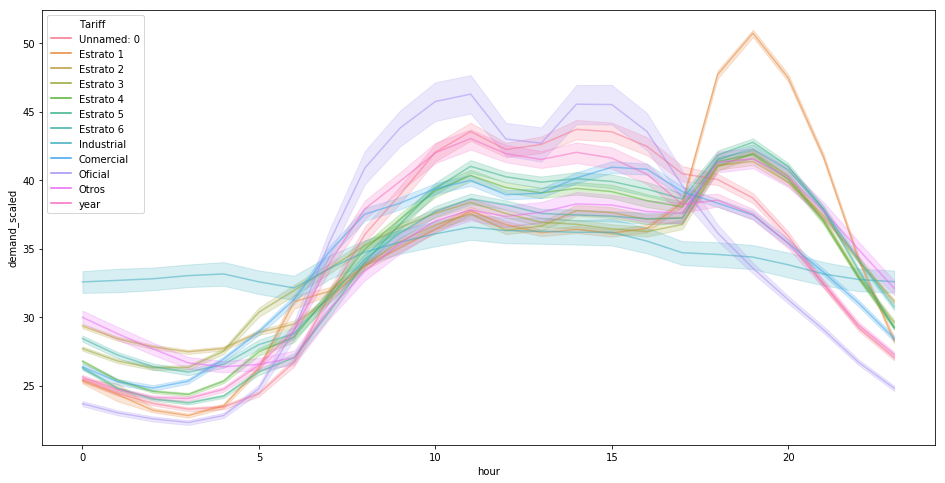

In [17]:
mean_demand_df.loc[mean_demand_df['Tariff'].isin([f"Estrato {j}" for j in range (1, 7)] + ['Comercial','Industrial','Oficial','Otros'])]
display(Markdown("#### Calculated Average Daily Demand Profile Based For Each Rate Class"))
fig, ax = plt.subplots(figsize = (16,8))
sns.lineplot(x = 'hour', y = 'demand_scaled', hue = 'Tariff', alpha = 0.5, data = mean_demand_df)

This seems to have worked quite well. For instance, the 'Oficial' rate has a sharp increase starting in the morning around 8 A.M., and a relatively sharp decrease in consumption in the evening. There's even a notable mid-day decrease in Oficial consumption around the noon - 2 P.M. lunch hour. 

The generated industrial demand profile is relatively flat, and Comercial is generally flatter than any of the residential rates. 

Each Estrato of Residencial rate is relatively similar, although there is some mid-day difference. Estrato 1 also has an extremely sharp increase at 10 p.m., which deserves further scrutiny. Although this sharp increase appears to be present even if the sampling size of averaged demand profiles is increased above 5. 



## Conclusion

Based on available data, it makes sense to model agents for dGen at the Municipio/Rate Class level, resulting in approximately 30,000 agents. 

The data we've collected from publicly available sources is enough to begin modeling dGen Colombia, _However_ the modeling process should be approached as a collaboration between all parties. It is important to get buy-in from key stakeholders such as UPME and XM who would likely benefit greatly from using the results provided by dGen. Therefor, it is imperative to the success of this project that communication channels are established between NREL and UPME to facilitate approval of data sources and the desired modeling scenarios. 

### Next Steps:
-  NREL and UPME should host a call, facilitated by USAID to discuss these preliminary findings, review available data sources, and discuss modeling requirements. 
-  If UPME is unresponsive, or is able to confirm the validity of the data outlined in this notebook, NREL can proceed with modeling based on this available data, and can update the input data once preliminary results can be presented to UPME. 